<a href="https://colab.research.google.com/github/DJCordhose/transformers/blob/main/notebooks/openai-embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embeddings


In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules # True if running in Google Colab.
IN_COLAB

True

In [2]:
if IN_COLAB:
    !pip install -q openai
    !pip install -q umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.8 MB/s eta 0:00:00


# OpenAI Client

In [3]:
# TODO: hier https://platform.openai.com/api-keys den eigenen Key erzeugen und eintragen
OPENAI_API_KEY = 'sk-proj-rGTDXhNzPFHEd6JjVfVVT3BlbkFJj2n5GBDHTwXu1r9dg3C5'

assert OPENAI_API_KEY != '...', "Bitte tragen Sie Ihren OpenAI API Key ein!"

In [4]:
from openai import OpenAI

client = OpenAI(
  api_key=OPENAI_API_KEY
)
models = client.models.list()

# Embeddings

Einführung
* https://qdrant.tech/documentation/concepts/search/
* https://openai.com/blog/new-embedding-models-and-api-updates

Links
* https://openai.com/blog/introducing-text-and-code-embeddings
* https://platform.openai.com/docs/guides/embeddings
* https://platform.openai.com/docs/quickstart?context=python&lang=Embeddings
* https://platform.openai.com/docs/guides/embeddings/what-are-embeddings



In [14]:
import numpy as np

texts=[
    "Das Essen war toll und die Bedienung war super!",
    "Uns hat das Restaurant sehr gefallen, sowohl die Speisen als auch der Service!",
    "Was für ein übles Erlebnis, meine Nudeln waren viel zu weich und es hat ewig gedauert, bis wir unser bedient wurden.",
    "Top Restaurant",
    "Elendiger Fraß",
    "Ich hatte nach dem Essen Salmonellen",
    "Es war alles super nachdem ich mir den Magen hab auspumpen lassen",
    "Ach, was für ein schöner Abend (not)",
    "Hunde mögen gern Knochen.",
    "Katzen lieben Wollknäuel",
]

response = client.embeddings.create(
    # https://openai.com/blog/new-embedding-models-and-api-updates
  # model="text-embedding-ada-002",  # Klassiker
  model="text-embedding-3-small",  # Das Neue in klein
  # model="text-embedding-3-large",  # Das Neue in groß
  input=texts
)

embeddings = np.array([embedding.embedding for embedding in response.data])
embeddings.shape

(10, 1536)

### Ähnlichkeit und Nähe von Embeddings

https://qdrant.tech/documentation/concepts/search/

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_matrix = cosine_similarity(embeddings)
cos_sim_matrix = np.round(cos_sim_matrix, 2)
cos_sim_matrix

array([[1.  , 0.72, 0.52, 0.41, 0.32, 0.45, 0.52, 0.41, 0.3 , 0.23],
       [0.72, 1.  , 0.47, 0.39, 0.24, 0.38, 0.4 , 0.38, 0.31, 0.24],
       [0.52, 0.47, 1.  , 0.21, 0.35, 0.46, 0.41, 0.35, 0.24, 0.22],
       [0.41, 0.39, 0.21, 1.  , 0.26, 0.26, 0.19, 0.24, 0.14, 0.08],
       [0.32, 0.24, 0.35, 0.26, 1.  , 0.39, 0.3 , 0.29, 0.31, 0.29],
       [0.45, 0.38, 0.46, 0.26, 0.39, 1.  , 0.51, 0.33, 0.27, 0.2 ],
       [0.52, 0.4 , 0.41, 0.19, 0.3 , 0.51, 1.  , 0.39, 0.24, 0.15],
       [0.41, 0.38, 0.35, 0.24, 0.29, 0.33, 0.39, 1.  , 0.24, 0.27],
       [0.3 , 0.31, 0.24, 0.14, 0.31, 0.27, 0.24, 0.24, 1.  , 0.57],
       [0.23, 0.24, 0.22, 0.08, 0.29, 0.2 , 0.15, 0.27, 0.57, 1.  ]])

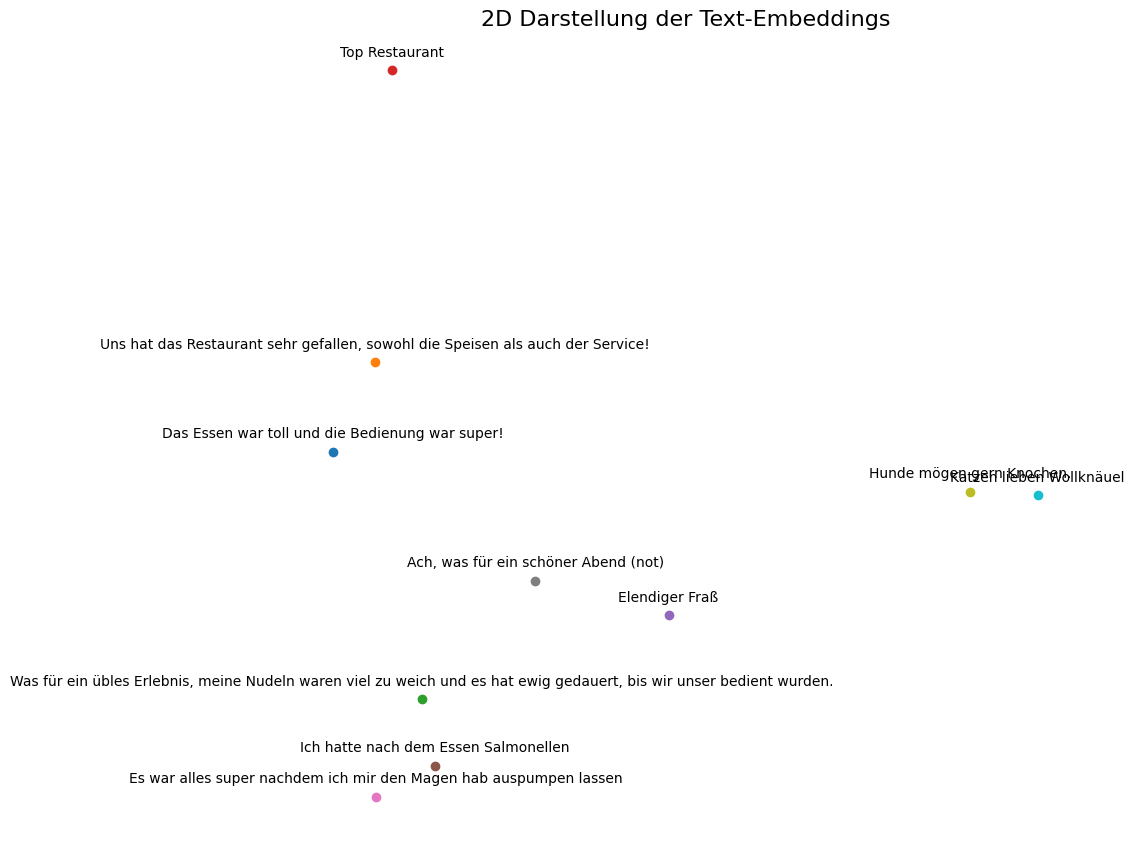

In [16]:
import matplotlib.pyplot as plt

# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=3)
# reduced_embeddings = tsne.fit_transform(embeddings)

# from umap import UMAP
# umap = UMAP(n_components=2, random_state=42, n_neighbors=3)
# reduced_embeddings = umap.fit_transform(embeddings)

# macht als einziges Sinn bei so wenigen Beispielen
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
for i, label in enumerate(texts):
    x, y = reduced_embeddings[i, :]
    plt.scatter(x, y)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.xticks([])
plt.yticks([])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# plt.xlabel('1. Hauptkomponente')
# plt.ylabel('2. Hauptkomponente')

# add space between title and plot
plt.subplots_adjust(top=1.5)

plt.title('2D Darstellung der Text-Embeddings', fontsize=16)

# compress distance between points
plt.gca().set_aspect('equal', 'box')


plt.show();